{'tiled': False, 'crs': CRS.from_epsg(32618), 'driver': 'GTiff', 'count': 4, 'interleave': 'pixel', 'nodata': None, 'transform': Affine(3.000100907572204, 0.0, 440568.7894231516,
       0.0, -2.9976532827548503, 693357.4699531968), 'dtype': 'uint16', 'height': 388, 'width': 446}
No. bands: 4
Width: 446
Height: 388
{1: 'uint16', 2: 'uint16', 3: 'uint16', 4: 'uint16'}
bounds: BoundingBox(left=440568.7894231516, bottom=692194.3804794879, right=441906.8344279288, top=693357.4699531968)
indexes: (1, 2, 3, 4)
band1 shape: (388, 446)
band1 type: <class 'numpy.ndarray'>
band1 dtype: uint16


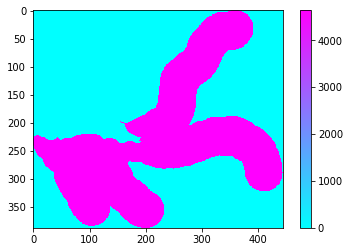

In [14]:
# Import Python 3's print function and division
from __future__ import print_function, division

# Import GDAL, NumPy, and matplotlib
from osgeo import gdal, gdal_array
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot


with rasterio.open('upper-0043.tif') as src:
    print(src.profile)
    print('No. bands: {sz}'.format(sz=src.count))
    print('Width: {sz}'.format(sz=src.width))
    print('Height: {sz}'.format(sz=src.height))
    print({i: dtype for i, dtype in zip(src.indexes, src.dtypes)})
    print('bounds: {sz}'.format(sz=src.bounds))
    print('indexes: {sz}'.format(sz=src.indexes))
    band1 = src.read(1)
    band2 = src.read(2)
    band3 = src.read(3)
    band4 = src.read(4)
    
    band1[band1 > 0] = 4630
    band2[band2 > 0] = 4101
    band3[band3 > 0] = 3305
    band4[band4 > 0] = 5228
    
    with rasterio.open('upper-0043_nodata.tif','w',driver='GTiff',height=src.height, width=src.width, count=4, dtype=band1.dtype, 
                       crs='+proj=latlong', transform=src.transform, nodata = 0) as dst:
        dst.write(band1, 1)
        dst.write(band2, 2)
        dst.write(band3, 3)
        dst.write(band4, 4)
    print('band1 shape: {sz}'.format(sz=band1.shape))
    print('band1 type: {sz}'.format(sz=type(band1)))
    print('band1 dtype: {sz}'.format(sz=band1.dtype))
    plt.imshow(band1, cmap=plt.cm.cool)
    plt.colorbar()
    plt.show()
    



In [5]:

img = gdal.Open('upper-0043.tif')
new_shape = (img.shape[0] * img.shape[1], img.shape[2])
img_as_array = img[:, :, :4].reshape(new_shape)

print('Our img matrix reshaped is sized: {sz}'.format(sz=img_as_array.shape))

for i in range(len(img_as_array)):
    if img_as_array[i][0] != 0 and img_as_array[i][1] != 0 and img_as_array[i][2] != 0 and img_as_array[i][3] != 0:
        img_as_array[i] = [4630, 4101, 3305, 5228]
        #print(img_as_array[i])

final_image = img_as_array.reshape(img.shape)
print('Our img matrix reshaped is sized: {sz}'.format(sz=final_image.shape))

AttributeError: shape

In [43]:
# Read the input raster into a Numpy array
infile = "one-poly.tif"
data   = gdal.Open(infile)
arr    = data.ReadAsArray()

[cols,rows] = arr.shape
trans       = data.GetGeoTransform()
proj        = data.GetProjection()
outfile     = "outputfile.tif"


# Create the file, using the information from the original file
outdriver = gdal.GetDriverByName("GTiff")
outdata   = outdriver.Create(str(outfile), rows, cols, 1, gdal.GDT_Float32)

# Write the array to the file, which is the original array in this example
    outdata.GetRasterBand(1).WriteArray(final_image)
    
    # Georeference the image
    outdata.SetGeoTransform(trans)

    # Write projection information
    outdata.SetProjection(proj)

ValueError: too many values to unpack (expected 2)